# Mall Customer Segmentation

This project uses K-means clustering to segment customers based on their annual income and spending behavior. The goal is to identify distinct groups of customers for better marketing strategies.

---

### Objectives:
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Apply K-means clustering to segment customers into distinct groups.
3. Visualize the results and interpret the clusters.

### Tools and Libraries:
- Python
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn


# Step 1: Load the Dataset

In [44]:
# 1: Import pandas
import pandas as pd

# 2: Loading the dataset
data = pd.read_csv('Mall_Customers.csv')

# 3: Preview the first few lines
print("Dataset Preview: ")
print(data.head())

Dataset Preview: 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Step 2: Inspect the Dataset

In [45]:
# 4: Get information about the dataset
print("\nDataset Info:")
print(data.info())

# 5: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

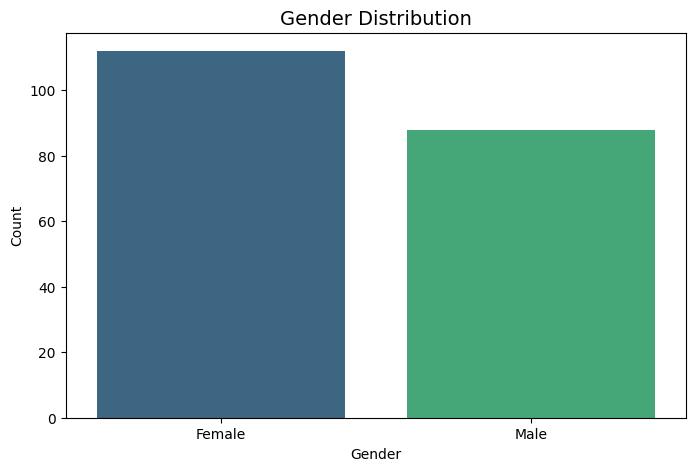

In [46]:
# Step 3.1: Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3.2: Visualize Gender distribution
gender_counts = data['Gender'].value_counts() # This counts the occurences of each gender
plt.figure(figsize=(8, 5)) # creates a graph that is width 10 and height 4.
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, dodge=False, palette='viridis') # plot of bar and setting x-axis and  y-axis
# x-axis is the count of genders index (how many types of genders)
# y-axis is the count of gender values (how many total for each gener)
# hue explicitly says that the palette applies to unique categories in gedner_counts.index
# palette is for the choice of color themes
# dodge makes sure that no bars are separated for subcategories
plt.title("Gender Distribution", fontsize=14) # title of the graph
plt.xlabel("Gender") # title of the x-axis
plt.ylabel("Count") # title of the y-axis
plt.show() # present the graph


### What it shows:
- There are slightly more female customers than male customers in the dataset.

### Insights:
- Marketing targets can consider targeting females slightly more, but the difference is not drastic.

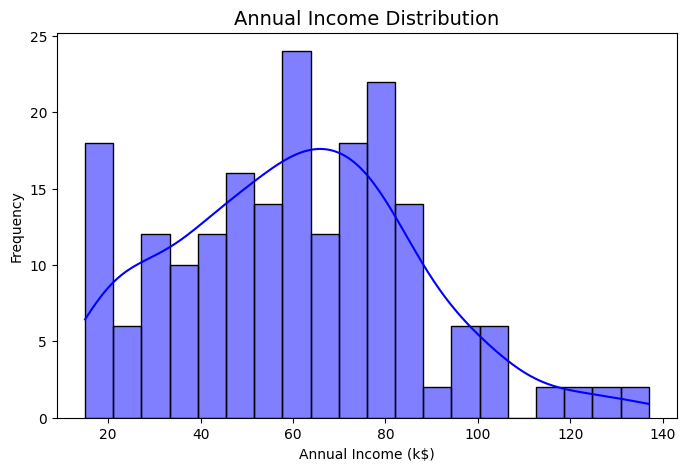

In [47]:
# Step 3.3: Visualize Annual Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title("Annual Income Distribution", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

### What it shows:
- The annual income ranges between $15k and $137k
- The distribution appears to be bimodal (two peaks around $50k-$60k and $70k-$80k)

### Insights:
- The two peak suggests that there are distinct income groups within the customers
- This could imply different customer demographics and market segments (e.g., mid-income and high-income groups)

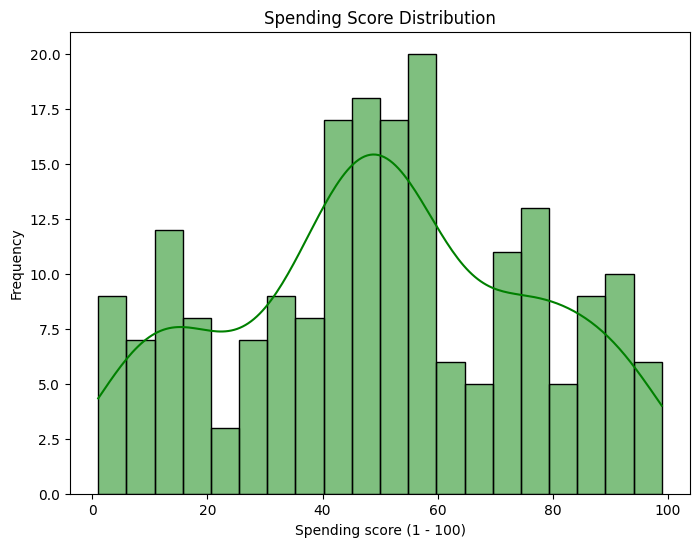

In [48]:
# Step 3.4: Visualize Spending Score distribution
plt.figure(figsize=(8,6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending score (1 - 100)')
plt.ylabel('Frequency')
plt.show()

### What it shows:
- The spending score ranges from 1 to 99.
- The distribution is nearly uniform, with some peaks in the middle range (40-60).

### Insights:
- Customers have a wide range of spending habits, therefore, segmentation might reveal distinct spending groups.

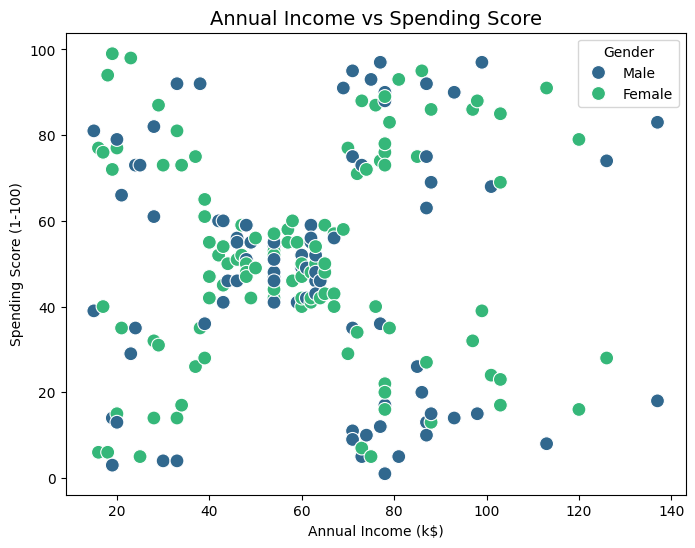

In [49]:
# Step 3.5: Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data, palette='viridis', s=100)
plt.title("Annual Income vs Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Gender')
plt.show()


### What it shows:
- The data points are scattered across the graph, with some visible clusters.
- There appear to be groups of customers:
    - High income but low spending:
    - Low income but high spending:
    - Medium income with a range of spending scores.

### Insights:
- The scatter plot is critical for clustering because it shows distinct behavioral patterns.
- K-means clustering should be able to identify these groups clearly.

# Data Preprocessing and K-Means Clustering

## Step 1: Data Preprocessing

### 1.1 Select Relevant Features

We will focus on ***Annual Income (k$)*** and ***Spending Score (1-100)*** as these are numerical and directly related to customer segmentation.

In [50]:
# Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Preview the selected features
print("Selected Features:\n", features.head())

Selected Features:
    Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


## 1.2 Normalize the Data

In [51]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to a DataFrame from easier readability
normalized_features = pd.DataFrame(normalized_features, columns=['Annual Income', 'Spending Score'])

# Preview the normalized data
print("Normalized Features:\n", normalized_features.head())

Normalized Features:
    Annual Income  Spending Score
0       0.000000        0.387755
1       0.000000        0.816327
2       0.008197        0.051020
3       0.008197        0.775510
4       0.016393        0.397959


## Step 2: Apply K-Means Clustering

### 2.1 Fit the K-Means Algorithm

In [52]:
# import the libraries
from sklearn.cluster import KMeans

# Fit K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters and a random seed for reproducibility
# note that random seed ensures the reproducibility. Without this, the result might vary every time you run the code
kmeans.fit(normalized_features)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Preview the dataset with cluster assignments
print("Clustered Data:\n", data.head())

Clustered Data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        2  
2        0  
3        2  
4        0  


### 2.2 Determine Optimal Clusters: Elbow Method

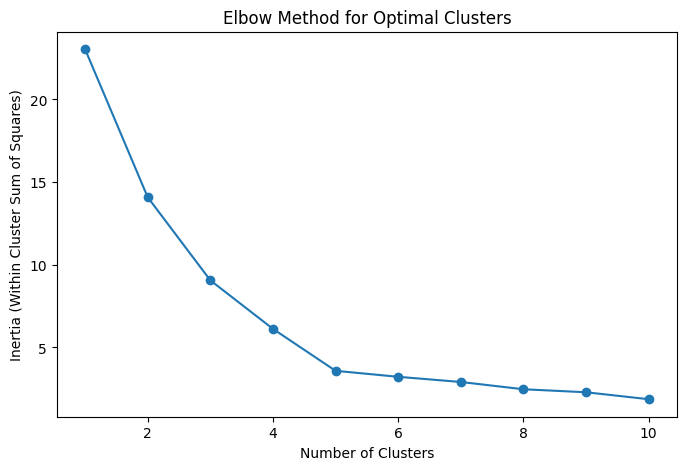

In [53]:
# Determining optimal clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.show()

### Step 2.3: Refit K-means with K = 4

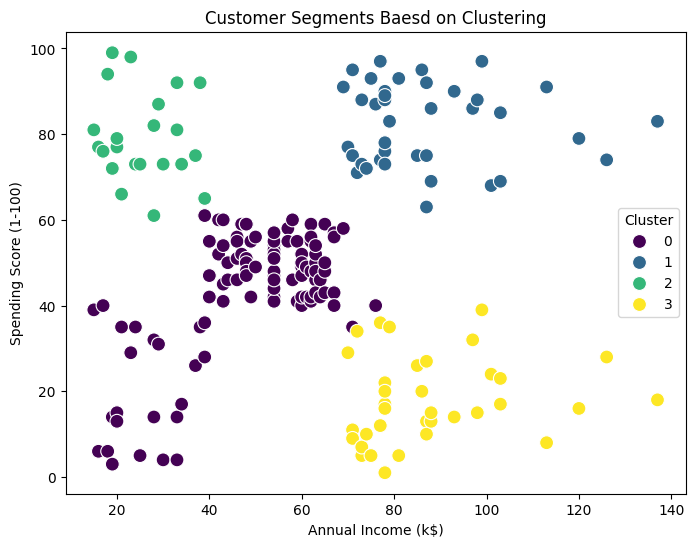

In [54]:
# Refit K-means with K = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(normalized_features)

# Assign the new cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title("Customer Segments Baesd on Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

### Cluster Interpretation:

1. **Cluster 0 (Purple):**
    - Characteristics: Low income and low spending score.
    - Business Implication: Price-sensitive group; to target this group we need to focus on budget-friendly offers.

2. **Cluster 1 (Blue):**
    - Characteristics: High income and high spending score.
    - Business Implication: High-value customers; target with premium products or loyalty programs.
3. **Cluster 2 (Green):**
    - Characteristics: Low income but high spending score.
    - Business Implication: Potential over-spenders; target with promotions to retain them.
4. **Cluster 3 (Yellow)**
    - Characteristics: High income but low spending score.
    - Business Implication: Wealthier but cautious customers. focus on value-based offerings.

### Summarize Clusters Using Statistics

In [55]:
# Calculate mean Annual Income and Spending Score for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the cluster summary
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.660194               43.281553
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 87.750000               17.583333


## Recommendations for the Business

Based on the clustering results, here are actionable strategies for each customer group:

### Cluster 0 (Low-income, low-spending customers)
- **Characteristics**: Average annual income of \$48.7K and a spending score of 43.
- **Strategy**:
  - Focus on budget-friendly offers and discounts.
  - Introduce loyalty programs to encourage repeat purchases.
  - Use targeted marketing campaigns to drive engagement.

### Cluster 1 (High-income, high-spending customers)
- **Characteristics**: Average annual income of \$86.5K and a spending score of 82.
- **Strategy**:
  - Offer premium memberships or exclusive access to products.
  - Organize VIP events or personalized experiences to build loyalty.
  - Use high-value product recommendations to increase basket size.

### Cluster 2 (Low-income, high-spending customers)
- **Characteristics**: Average annual income of \$25.7K and a spending score of 79.
- **Strategy**:
  - Focus on promotional offers tailored to their spending patterns.
  - Provide installment payment plans for high-value purchases.
  - Build a strong relationship to retain this group as loyal customers.

### Cluster 3 (High-income, low-spending customers)
- **Characteristics**: Average annual income of \$87.8K and a spending score of 17.
- **Strategy**:
  - Highlight the long-term value and quality of products to encourage purchases.
  - Use educational marketing to showcase how the products meet their needs.
  - Develop campaigns that emphasize trust and brand reputation.
